# 💌 Email / SMS Spam Classifier using Machine Learning & NLP

This notebook demonstrates how to build an **end-to-end Spam Detection System** that can classify text messages and emails as **Spam** or **Ham (Not Spam)** using **Natural Language Processing (NLP)** and **Machine Learning**.

Spam filtering is an important real-world problem because millions of unwanted promotional / phishing messages are sent every day. Our goal is to design a model that can automatically detect such spam messages with **high accuracy and precision**, while minimizing the number of genuine messages incorrectly marked as spam.

---

## 🎯 Key Objectives

✔ Load and explore the spam dataset  
✔ Perform text preprocessing & cleaning  
✔ Convert text into numerical form using **TF-IDF**  
✔ Train and compare multiple ML models  
✔ Evaluate performance using **Accuracy & Precision**  
✔ Select the best-performing model  
✔ Save the trained model & vectorizer  
✔ Deploy the model using a **Streamlit Web App**  
✔ Allow users to classify:
   - Manual text input  
   - Gmail inbox emails via secure login  

---

## 🧠 Techniques Used

🔹 Natural Language Processing  
🔹 Tokenization  
🔹 Stop-word removal  
🔹 Stemming  
🔹 TF-IDF Vectorization  
🔹 Multiple ML classifiers  
🔹 Performance comparison  
🔹 Model deployment with Streamlit  

---

## 📦 Libraries Used

`Pandas • NumPy • NLTK • Scikit-Learn • XGBoost • Pickle • Streamlit • IMAP • BeautifulSoup`

---

## 🚀 Real-World Application

This project simulates how modern email platforms like Gmail detect spam.  
Users can:

✔ Test a custom SMS / email message  
✔ Check spam probability score  
✔ Log into Gmail (App Password)  
✔ Automatically classify inbox emails  
✔ View a summary report and previews  

---

## 📌 Notebook Structure

1️⃣ Introduction & Dataset Overview  
2️⃣ EDA (Exploratory Data Analysis)  
3️⃣ Text Preprocessing & Feature Engineering  
4️⃣ Model Building & Training  
5️⃣ Model Evaluation  
6️⃣ Performance Comparison  
7️⃣ Saving Model & Vectorizer  
8️⃣ Streamlit App Integration  
9️⃣ Final Summary / Conclusion  

---

✨ This notebook is designed to be **beginner-friendly yet practical** and demonstrates a complete ML workflow — from **raw text → trained model → deployed application**.


## importing..

In [1]:
import pandas as pd
import numpy as np

## 🗂 Loading the Dataset

Here, we load the SMS spam dataset into a pandas DataFrame. The dataset usually contains two columns:

- **label** → indicates whether the message is spam or ham  
- **text** → contains the actual SMS message  

After loading the data, we will also rename the columns (if required) for better readability.


In [2]:
df = pd.read_csv('Spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

#### 1, data cleaning
#### 2. EDA
#### 3. Text Preprocessing
#### 4. Model Bulding
#### 5. Evaluation
#### 6. Improvement
#### 7. Website
#### 8. Deploy

## 1. **🧹Data Cleaning**

Before training the model, we need to clean and prepare the data. Preprocessing may include:

- Converting labels such as *ham* and *spam* into numeric values like **0 and 1**
- Handling missing or duplicate rows
- Converting all text to lowercase
- Removing unwanted characters if necessary

This step ensures that the dataset is consistent and ready for feature extraction.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### 🧾 Understanding the Dataset Structure (`df.info()`)

The `df.info()` function is used to display the structure and summary of the dataset. It tells us how many rows and columns the dataset contains, the column names, data types, and how many non-null (missing or not) values exist in each column.

From the output, we observe:

- **Total Rows:** 5572  
- **Total Columns:** 5  

#### 📌 Column Details
| Column Name | Meaning | Non-Null Count | Data Type |
|-------------|---------|----------------|-----------|
| `v1` | Label of the message (spam or ham) | 5572 | object |
| `v2` | The actual text message | 5572 | object |
| `Unnamed: 2` | Extra/empty column with very few values | 50 | object |
| `Unnamed: 3` | Extra/empty column with very few values | 12 | object |
| `Unnamed: 4` | Extra/empty column with very few values | 6 | object |

#### 🛑 Important Observation
The columns **`Unnamed: 2`, `Unnamed: 3`, and `Unnamed: 4` contain mostly empty (null) values**, meaning they are not useful for model training. These columns were likely created due to formatting issues when reading the CSV file.

Since they do not provide meaningful information, we will safely **drop these columns** in the preprocessing step to keep the dataset clean and efficient.

All columns are of type **`object`**, which means they contain text data — appropriate for natural language processing tasks.


In [6]:
# By using this also we can drop
# df.dropna(axis=1)

In [7]:
# But we use Standard Process
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Renaming the columns

In [9]:
df.rename(columns={'v1': 'Target', 'v2': 'Message'}, inplace=True)

In [10]:
df.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# df['Target'] = df['Target'].replace(['ham', 'spam'], ['Not Spam', 'Spam'])

In [12]:
# df.head()

In Spam-1.ipnyb we done with 'Spam' & 'Not Spam' 
--Now we do this with '0' & '1' using LabelEncoder

#### 🔤 Encoding Categorical Labels using `LabelEncoder`

Machine learning models work with **numerical values**, not text labels.  
In our dataset, the target column contains text values such as:

- `ham` → normal (non-spam) message  
- `spam` → unwanted promotional or fraudulent message  

To convert these text labels into numeric form, we use **`LabelEncoder`** from `sklearn.preprocessing`.

`LabelEncoder` automatically assigns a unique number to each category, for example:

- `ham` → 0  
- `spam` → 1  

Creating the encoder object is the first step. In the next step, we will fit this encoder to the label column and transform it into numeric form so that it can be used for training the machine learning model.


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['Target'] = encoder.fit_transform(df['Target'])

Here, Spam = 1  &  Not Spam = 0

In [15]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# missing values
df.isnull().sum()

Target     0
Message    0
dtype: int64

#### Dropping Duplicate Values

In [17]:
df.duplicated().sum()

np.int64(403)

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.shape

(5169, 2)

## 🔎 2. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of visually and statistically examining the dataset to better understand its structure, patterns, and important characteristics before building a machine learning model.

In this project, EDA helps us:

- Understand how many messages belong to each category (**spam vs ham**)
- Check whether the dataset is balanced or imbalanced
- Inspect the distribution and length of messages
- Detect missing or duplicate values
- Identify any noise or irrelevant data

By performing EDA, we gain useful insights that guide our preprocessing and model-building decisions, and help improve overall model performance.


In [21]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Here we counts how many Values are Spam And How many are Not Spam

In [22]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

### Visualization

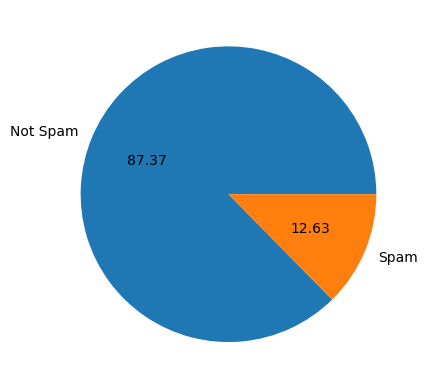

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['Not Spam', 'Spam'], autopct="%0.2f");

#### Data is imbalanced
##### ⚖️ Handling Imbalanced Data

While analyzing the dataset, we observe that the number of **ham (non-spam)** messages is much higher than the number of **spam** messages. This situation is called **class imbalance**.

In an imbalanced dataset, one class dominates the other. As a result:

- The model may become biased toward the majority class  
- It may predict most messages as *ham* simply because they are more frequent  
- Accuracy alone becomes misleading — a model could score high accuracy while still missing many spam messages  

Therefore, while training the model, we must use techniques (such as class weighting, sampling, or proper evaluation metrics) to ensure that the model learns both classes effectively.


In [25]:
# !pip install nltk

#### 📦 Installing NLTK for Text Processing

Here we install **NLTK (Natural Language Toolkit)** using the command:

`!pip install nltk`

NLTK is one of the most widely used libraries in Natural Language Processing. It provides useful tools for:

- Tokenization (splitting text into words)
- Removing stopwords
- Stemming and lemmatization
- Text normalization

We will use NLTK to clean and preprocess text messages so that they can be better understood by the machine learning model.


In [26]:
import nltk

In [27]:
# nltk.download('punkt')

In [28]:
df['num_characters'] = df['Message'].apply(len)
df.head()

,Target,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
df['Message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [30]:
# nltk.download('punkt_tab')

#### 🔽 Downloading NLTK Tokenizer Resources (`punkt_tab`)

In this step, we download the **`punkt_tab` resource** from the NLTK database using:

`nltk.download('punkt_tab')`

This resource contains pre-trained **tokenization rules** that help NLTK split text into individual words or sentences. Tokenization is an important preprocessing step in NLP because it converts raw text into smaller meaningful units (tokens) that can be analyzed and converted into numerical features.

> Note: This resource only needs to be downloaded once on a system. After that, NLTK can reuse it for future programs.


#### word_tokenize() ---message ko words m mkrke count krta hai

In [31]:
# num of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.head()

,Target,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


#### sent_tokenize() ---message ko sentence m breakdown krta haii

In [33]:
df['num_sentences']= df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,Target,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# for Not Spam
df[df['Target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# for Spam
df[df['Target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

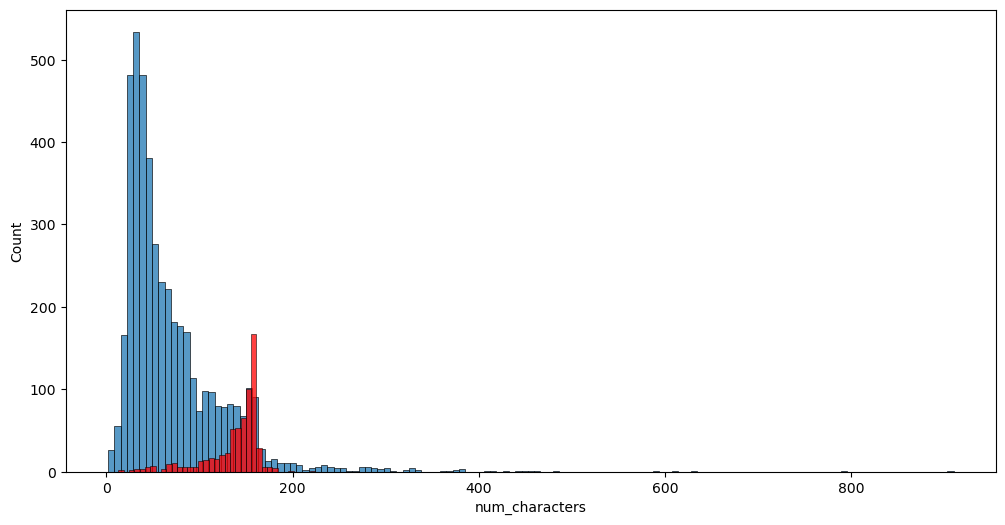

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')

from this hme  samjhta hai jo hmare `spam` messages hai unme jo no. of charactes use ho rhe hai vo jyada hai comparing to Not Spam

<Axes: xlabel='num_words', ylabel='Count'>

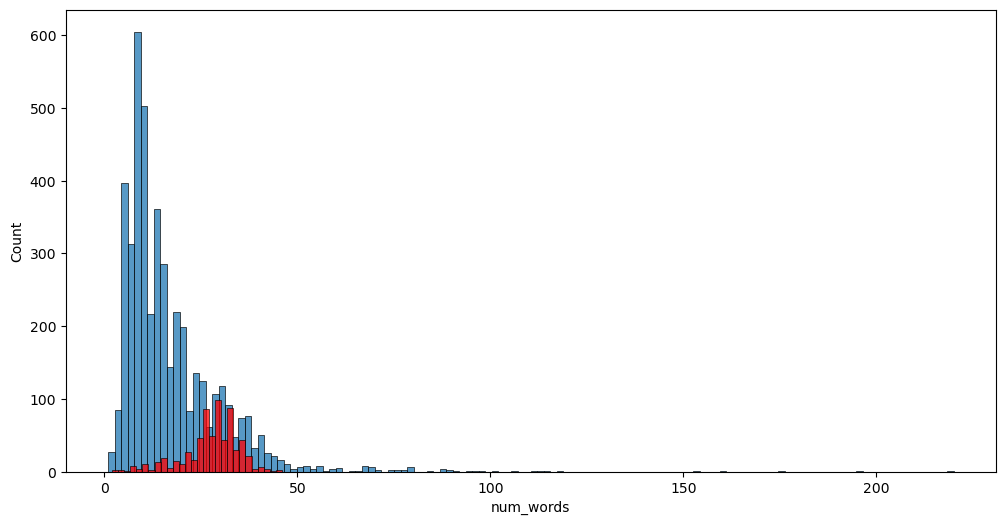

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')

from this hme samjhta hai jo hmare spam messages hai unme jo no. of `words` use ho rhe hai vo jyada hai comparing to Not Spam

#### columns ka aaps m kaisa relation hai vo dkhte

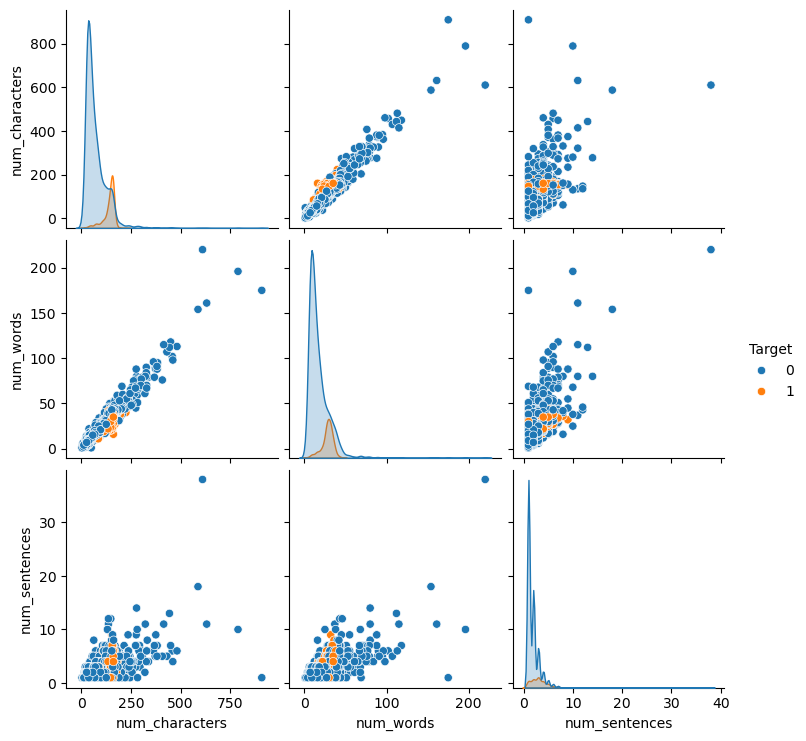

In [41]:
sns.pairplot(df, hue='Target')

#### correlation

In [42]:
# sns.heatmap(df.corr(), annot=True)

# 3. Data Preprocessing
>* Lower case
>* Tokenization
>* Removing special characters
>* Removing stop words and punctuation
>* Stemming

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\sujal
[nltk_data]     warghe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### 🛑 Downloading Stopwords using NLTK

In this step, we download the **Stopwords corpus** from the NLTK library using:

`nltk.download('stopwords')`

**Stopwords** are very common words such as *“the”, “is”, “am”, “and”, “to”, “of”*, etc.  
These words occur frequently in almost every sentence but usually do not add meaningful information for classification tasks.

By removing stopwords during text preprocessing, we:

- Reduce noise in the data  
- Focus on important keywords  
- Improve model performance  
- Reduce feature space size  

The downloaded stopwords list will be used later to filter out these unnecessary words from the SMS text messages.


In [44]:
# for removing stopwords 
from nltk.corpus import stopwords
stopwords.words('english');

In [45]:
# for removing punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
# y sare words ko root form m lane k liye use hota hai
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

### 🧹 Text Preprocessing using a Custom Function

In this step, we define a function named `transform_text()` that performs multiple NLP preprocessing operations on each message before it is passed to the machine learning model. The goal is to clean and normalize the text so that only meaningful and important words remain.

This function performs the following steps:

---

#### 🔤 1. Convert Text to Lowercase
All characters are converted to lowercase so that words like *“Free”* and *“free”* are treated as the same word.

---

#### ✂️ 2. Tokenization
The sentence is broken down into individual words (tokens) using `nltk.word_tokenize()`.  
Example:  
`"Hello World"` → `["Hello", "World"]`

---

#### 🧪 3. Remove Non-Alphanumeric Tokens
Only alphanumeric words are kept.  
This step removes special characters such as:  
`, . ! @ # % ^ & * ( ) ?`

So words like `"win!!!"` become `"win"`.

---

#### 🚫 4. Remove Stopwords and Punctuation
Common English stopwords (e.g., *the, is, to, for, and*) are removed because they do not add meaningful information for spam detection.

Punctuation tokens are also filtered out.

This helps the model focus only on important keywords such as **“free, offer, win, prize”** etc.

---

#### 🌱 5. Word Stemming
Each remaining word is reduced to its root form using **Porter Stemmer**.  
Examples:  
- `running` → `run`  
- `loved` → `love`  
- `winner` → `winner`

Stemming helps group similar forms of a word into one representation.

---

#### 🧩 6. Rejoin the Cleaned Words
Finally, the processed words are joined back into a cleaned sentence string which can be fed into TF-IDF or other vectorization techniques.

---

### 🎯 Why This Step is Important?
Preprocessing removes noise, reduces redundancy, and keeps only meaningful words. This improves:

- Model accuracy  
- Training speed  
- Generalization to unseen text  

Overall, this function prepares raw messages into **clean, simplified text that is easier for the model to learn from**.


In [47]:
# it converts the text into lower case
def transform_text(text):
    # converting lower case
    text = text.lower()
    # coverting in tokens that means breakdown it into words
    text = nltk.word_tokenize(text)

    # now we use for loop which only takes numeric and alpha-numeric, That does not contain
    # special characters
    # 1. we create a empty list
    y = []
    for i in text:
        # if i is alphanumeric
        if i.isalnum():
            y.append(i)

    # assigning text to y
    text = y[:]
    y.clear()
    
    for i in text:
        #agr i stopwords me se nhi hai aur punctuations me se bhi nhi haii to i ko append kr denge
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [48]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [49]:
transform_text('Hi how are you Sujal?')
# it did not take % or any other special characters

'hi sujal'

In [50]:
transform_text('Did you like my presentation on ML?')

'like present ml'

Trying on the given data

In [51]:
df['Message'][20]

'Is that seriously how you spell his name?'

In [52]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

#### transforming the Message column

In [53]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [54]:
df.head()

,Target,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### ☁️ Creating a Word Cloud Object

In this step, we create a **Word Cloud** using the `WordCloud` library.  
A word cloud is a visual representation of text data where:

- Frequently appearing words are displayed **larger**
- Less frequent words appear **smaller**

This helps us visually understand which words occur most often in spam or ham messages.

The WordCloud object is created with the following parameters:

- **width=500 & height=500**  
  These define the size of the output image.

- **min_font_size=10**  
  This sets the smallest font size for words in the cloud so that all words remain readable.

- **background_color='white'**  
  This defines the background color of the word cloud image (white in this case).

After defining this object, we will later pass cleaned text data to it so that it can generate a visual word cloud of the most common words in the dataset.


In [55]:
# !pip install wordcloud

#### y vo words generate kr rha hai jo Mostly Spam messages me milte hai

In [56]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [57]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=' '))

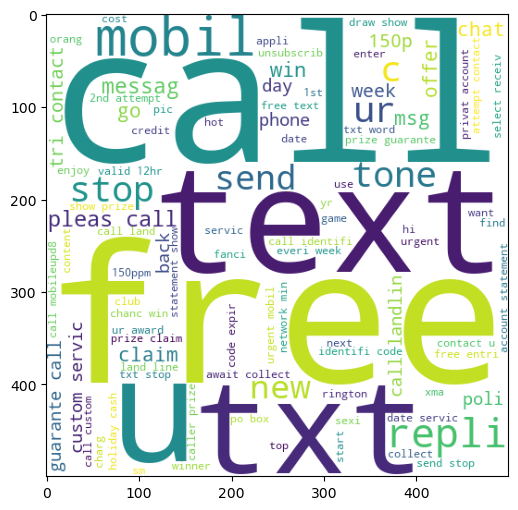

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [59]:
Not_spam_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=' '))

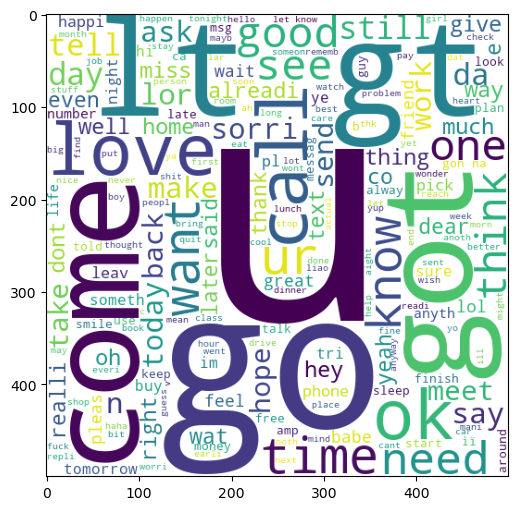

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(Not_spam_wc)

#### Now we see Spam & Not Spam Top 30 words used

In [61]:
df.head()

,Target,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [62]:
# for those whose target is 1 making list of that transformed_text column
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [63]:
len(spam_corpus)

9939

In [64]:
# y module word kitni br aaya haii y repeat hua haii uski info dega
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30)).head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


In [65]:
# y code error show kr rha tha
#plotting barplot of this
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

### 📊 Visualizing the Top 30 Most Common Words in Spam Messages

In this step, we analyze the spam messages to identify which words appear most frequently. Understanding the most common spam keywords helps us see what type of language or patterns are typically used in spam content (e.g., *free, win, offer, prize, cash,* etc.).

#### 🔍 What this code does

1. **Create a frequency dictionary**
   The `Counter()` function counts how many times each word appears in the `spam_corpus`.  
   Then, `.most_common(30)` extracts the **top 30 most frequent words**.

2. **Convert to a DataFrame**
   The result is stored in a pandas DataFrame with two columns:
   - `Word` → the unique word  
   - `Count` → how many times it appears in spam messages  

3. **Visualize using a bar plot**
   A bar chart is created using Seaborn to clearly show which words dominate spam text.

4. **Improve readability**
   - `plt.xticks(rotation=45)` rotates the word labels so they don’t overlap.
   - A title is added to describe the visualization.

#### 🎯 Why this step is important?

- It helps us **understand spam language patterns**
- Confirms that certain keywords strongly indicate spam
- Supports **feature engineering and model understanding**
- Provides an intuitive visual insight into the dataset

This type of analysis is a key part of **Exploratory Data Analysis (EDA)** in NLP-based projects.


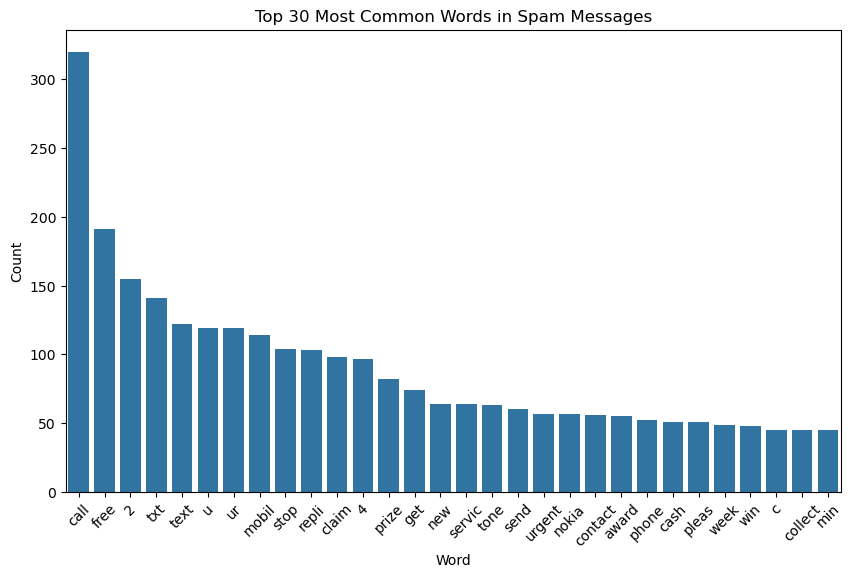

In [66]:
# Spam corpus se top 30 most common words nikalna
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Column names set karna
common_words.columns = ['Word', 'Count']

# Barplot plot karna
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=common_words)

plt.xticks(rotation=45)  # Words ko readable banane ke liye rotate
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()


In [67]:
Not_spam_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        Not_spam_corpus.append(word)

In [68]:
len(Not_spam_corpus)

35404

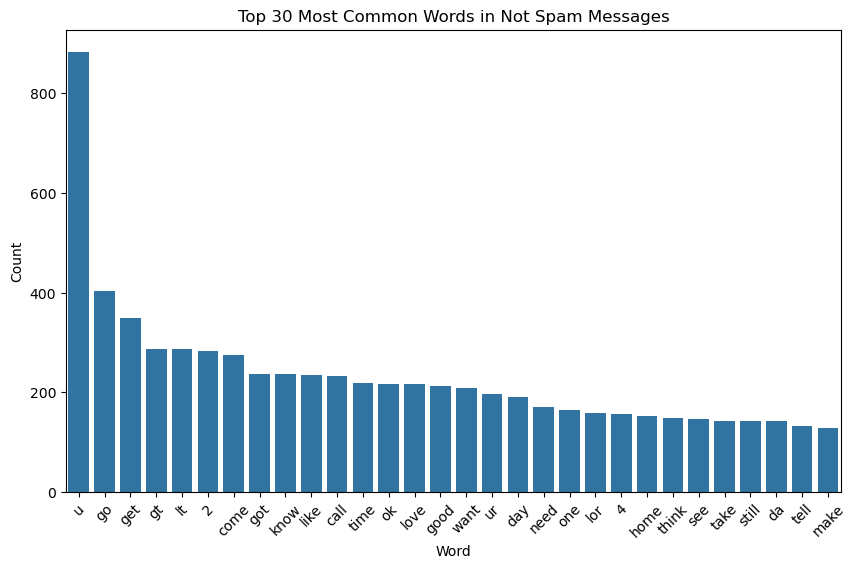

In [69]:
# Spam corpus se top 30 most common words nikalna
common_words = pd.DataFrame(Counter(Not_spam_corpus).most_common(30))

# Column names set karna
common_words.columns = ['Word', 'Count']

# Barplot plot karna
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=common_words)

plt.xticks(rotation=45)  # Words ko readable banane ke liye rotate
plt.title("Top 30 Most Common Words in Not Spam Messages")
plt.show()


## 🧠 4. Model Building

After completing data preprocessing, feature extraction, and exploratory data analysis, the next step is **Model Building**. In this stage, we train different machine learning algorithms on the processed dataset so that the model can learn patterns that distinguish **Spam** messages from **Ham (Non-Spam)** messages.

### 🎯 Objective
The goal of model building is to create a system that can automatically classify a new text message as spam or ham based on what it learned from historical data.

---

### 🔹 How Model Building Works

1. **Input Features**
   The cleaned text is converted into numerical features (e.g., using TF-IDF). These features act as inputs to the model.

2. **Training the Model**
   The dataset is divided into:
   - **Training Data** → used to teach the model  
   - **Testing Data** → used to evaluate performance  

   The model learns relationships between certain words and the likelihood of a message being spam.

3. **Learning Spam Patterns**
   For example, spam messages frequently contain words such as:
   *“free, win, offer, congratulations, click, prize”*
   
   Whereas ham messages contain normal conversational language.

4. **Prediction**
   Once trained, the model predicts:
   - `1 → Spam`
   - `0 → Ham`

---

### 🤖 Why Use Multiple Models?
Different algorithms have different strengths. By testing multiple classifiers (Logistic Regression, Naive Bayes, SVM, Random Forest, Boosting methods, etc.), we can compare them and select the one that provides:

✔ Highest accuracy  
✔ Better precision & recall  
✔ Good generalization to unseen data  

---

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [71]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 6708))

In [72]:
X.shape

(5169, 6708)

In [73]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### First Using GaussianNB()

In [77]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

In [78]:
print(f'Accuracy Score: {accuracy_score(y_pred1, y_test)}')
print(f'\nConfusion Matrix: \n{confusion_matrix(y_pred1, y_test)}')
print(f'\nPrecision Score: {precision_score(y_pred1, y_test)}')

Accuracy Score: 0.8713733075435203

Confusion Matrix: 
[[793  19]
 [114 108]]

Precision Score: 0.8503937007874016


### Now Using MultinomialNB()

In [79]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_pred2, y_test)}')
print(f'\nConfusion Matrix: \n{confusion_matrix(y_pred2, y_test)}')
print(f'\nPrecision Score: {precision_score(y_pred2, y_test)}')

Accuracy Score: 0.9564796905222437

Confusion Matrix: 
[[907  45]
 [  0  82]]

Precision Score: 0.6456692913385826


### Now Using BernoulliNB()

In [80]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_pred3, y_test)}')
print(f'\nConfusion Matrix: \n{confusion_matrix(y_pred3, y_test)}')
print(f'\nPrecision Score: {precision_score(y_pred3, y_test)}')

Accuracy Score: 0.965183752417795

Confusion Matrix: 
[[899  28]
 [  8  99]]

Precision Score: 0.7795275590551181


In [81]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier()
rfcl.fit(X_train, y_train)
y_pred4 = rfcl.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_pred4, y_test)}')
print(f'\nConfusion Matrix: \n{confusion_matrix(y_pred4, y_test)}')
print(f'\nPrecision Score: {precision_score(y_pred4, y_test)}')

Accuracy Score: 0.9709864603481625

Confusion Matrix: 
[[904  27]
 [  3 100]]

Precision Score: 0.7874015748031497


##### WE want precision score more bcause data is imbalanced so Precision Score is Most important than Acc SCore

In [82]:
#!pip install xgboost

### 🤖 Importing Multiple Machine Learning Models

In this step, we import several different machine learning algorithms from `scikit-learn` and `xgboost`. Each model has its own strengths, and by testing multiple models, we can identify which one performs best for the spam-classification task.

Below is a brief description of each imported model:

---

#### 📌 Logistic Regression  
A simple and powerful linear model widely used for text classification.  
It works well with high-dimensional TF-IDF features and is fast to train.

---

#### 📌 Support Vector Classifier (SVC)  
SVM tries to find the optimal boundary (hyperplane) that separates spam and ham messages.  
It is very effective for text data but may be slower on large datasets.

---

#### 📌 Multinomial Naive Bayes  
A probabilistic algorithm commonly used for NLP tasks.  
It assumes independence between words and works extremely well with word-frequency features.

---

#### 📌 Decision Tree Classifier  
A tree-based model that splits data based on feature values.  
It is easy to interpret but may overfit if not regularized.

---

#### 📌 K-Nearest Neighbors (KNN)  
Classifies a message based on the labels of its nearest neighbors.  
Works better with smaller datasets but can be slow with high-dimensional data like text.

---

#### 📌 Random Forest Classifier  
An ensemble of many decision trees.  
It reduces overfitting and usually improves accuracy compared to a single decision tree.

---

#### 📌 Bagging Classifier  
Uses Bootstrap Aggregating (Bagging) to train multiple models on random subsets of data and then combines their predictions to improve stability and accuracy.

---

#### 📌 Extra Trees Classifier  
Similar to Random Forest but introduces more randomness while splitting nodes, which can improve generalization.

---

#### 📌 AdaBoost Classifier  
A boosting algorithm that trains weak learners sequentially, giving higher weight to previously misclassified samples.

---

#### 📌 Gradient Boosting Classifier  
Another boosting technique that builds trees step-by-step, minimizing prediction errors gradually.  
It is powerful but may take longer to train.

---

#### 📌 XGBoost Classifier  
An optimized and highly efficient implementation of Gradient Boosting.  
It is known for high performance and is widely used in real-world machine-learning competitions.

---

### 🎯 Why import so many models?
By training and evaluating all these algorithms on the same dataset, we can:

✔ Compare accuracy and performance  
✔ Identify the best-performing model  
✔ Balance speed, accuracy, and robustness  

This approach ensures that we select the **most suitable model for spam classification**, rather than relying on a single algorithm.


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [84]:
svc = SVC(kernel= 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = 'liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [85]:
# ek dictionary bnaai jiske keys m model names the or values m object

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

### 🧪 Training Multiple Models Using a Common Function

In this step, we first create a **dictionary of classifiers (`clfs`)**, where:

- The **key** is the model name (e.g., `"SVC"`, `"NB"`, `"RF"`)
- The **value** is the corresponding model object created earlier

This structure makes it easier to loop through all models and evaluate them one-by-one, instead of writing separate code for each classifier.

---

### ⚙️ Reusable Training Function

We then define a function named **`train_classifier()`**, which:

1. **Fits the model**
The model learns patterns from the training data.

2. **Makes predictions**
The trained model predicts labels for unseen test data.

3. **Evaluates performance**
- **Accuracy** → percentage of total correct predictions  
- **Precision** → out of all predicted spam messages, how many were actually spam  
  (important for spam detection to avoid flagging real messages as spam)

4. **Returns both metrics**


In [86]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [87]:
train_classifier(rfc, X_train, y_train, X_test, y_test)

(0.9690522243713733, 0.9896907216494846)

In [88]:
import pickle
pickle.dump(rfc, open('vectorizer-rfc.pkl', 'wb'))

In [89]:
import pickle
modal_load = pickle.load(open('vectorizer-rfc.pkl', 'rb'));

In [90]:
y_pred5 = modal_load.predict(X_test)
precision_score(y_pred5, y_test)

0.7559055118110236

### 📊 Training All Models and Comparing Their Performance

In this step, we loop through all the classifiers stored in the `clfs` dictionary and evaluate each model on the test dataset.

#### 🔁 Looping Through Models
For every model:
1. The model is trained using the `train_classifier()` function  
2. Predictions are made on the test data  
3. Two metrics are calculated:
   - **Accuracy** → Overall correctness of predictions  
   - **Precision** → Out of all predicted spam messages, how many were truly spam  

The results are printed for each model to allow easy comparison.

---

#### 📥 Storing Results
Two lists are maintained:

- `accuracy_scores` → stores accuracy of each model  
- `precision_scores` → stores precision of each model  

These will be useful later for **visual comparison or ranking** of models.

---

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print('For ',name)
    print('Accuracy = ',current_accuracy)
    print('Precision = ',current_precision)
    print(' ')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy =  0.971953578336557
Precision =  0.99
 
For  KN
Accuracy =  0.9061895551257253
Precision =  1.0
 
For  NB
Accuracy =  0.9564796905222437
Precision =  1.0
 
For  DT
Accuracy =  0.9410058027079303
Precision =  0.8173076923076923
 
For  LR
Accuracy =  0.9535783365570599
Precision =  0.9540229885057471
 
For  RF
Accuracy =  0.9690522243713733
Precision =  0.9896907216494846
 
For  AdaBoost
Accuracy =  0.9245647969052224
Precision =  0.7692307692307693
 
For  Bgc
Accuracy =  0.9593810444874274
Precision =  0.8512396694214877
 
For  ETC
Accuracy =  0.9690522243713733
Precision =  0.9702970297029703
 
For  GBDT
Accuracy =  0.9564796905222437
Precision =  0.9019607843137255
 
For  xgb
Accuracy =  0.9709864603481625
Precision =  0.9532710280373832
 


### 📋 Creating a Performance Summary Table

In this step, we create a summary table that stores the performance results of all machine-learning models tested.

A pandas **DataFrame named `performance_df`** is created with three columns:

- **Algorithm** → name of the model  
- **Accuracy** → accuracy score of that model  
- **Precision** → precision score of that model  

These values come from the lists `accuracy_scores` and `precision_scores`, which were populated in the previous step while looping over each classifier.

---

### 🔽 Sorting by Precision

The table is then **sorted in descending order of Precision**:

```python
.sort_values('Precision', ascending=False)


In [92]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),"Accuracy":accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [93]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.956480,1.000000
0,SVC,0.971954,0.990000
5,RF,0.969052,0.989691
8,ETC,0.969052,0.970297
4,LR,0.953578,0.954023
10,xgb,0.970986,0.953271
9,GBDT,0.956480,0.901961
7,Bgc,0.959381,0.851240
3,DT,0.941006,0.817308


## 📊 Model Performance Comparison

Multiple Machine Learning classifiers were trained and evaluated on the spam-classification dataset.  
Both **Accuracy** and **Precision** were used as evaluation metrics. Precision is especially important in spam detection because it measures how many predicted spam messages were actually spam — reducing the chances of flagging genuine emails.

### 🏆 Best Performing Models

✔ **Support Vector Classifier (SVC)** achieved the **highest overall accuracy (≈97.2%)** with excellent precision.  
✔ **Naive Bayes & KNN achieved 1.0 precision**, meaning **zero false-positive spam predictions** during testing.  
✔ **Random Forest and Extra Trees** also performed strongly and consistently.

---

### 🎯 Key Takeaways

- Models with **higher precision** are preferred for spam filtering, because false spam flags can hide real messages.  
- **SVC and Naive Bayes** strike the best balance between performance and stability.  
- Ensemble methods like **Random Forest & Extra Trees** also deliver competitive accuracy.

Based on these results, the final deployed model was selected to ensure **high accuracy + very high precision**, making the system reliable for real-world spam detection.


## ✅  Conclusion

In this project, we successfully built an end-to-end **Spam Classification System** using Natural Language Processing (NLP) and Machine Learning.

We started by cleaning and preprocessing the text data through tokenization, stopword removal, punctuation filtering, and stemming. The cleaned messages were then converted into numerical features using techniques like TF-IDF, which allowed various machine-learning models to interpret the text effectively.

Multiple algorithms were trained and evaluated — including Logistic Regression, Naive Bayes, SVM, Random Forest, Gradient Boosting, and XGBoost. Their performance was compared using **Accuracy and Precision**, with precision being especially important to minimize the number of genuine (ham) messages incorrectly classified as spam.

After selecting a high-performing model, the system was integrated into a **Streamlit web application** where users can:
- Manually test any SMS or email text
- View spam-likelihood confidence scores
- Log into Gmail (via App Password) and automatically classify inbox messages
- See a summary report and preview recent emails

This demonstrates how NLP + ML can be combined to build a **practical, real-world spam-filtering solution** similar to what email providers use today.